<a href="https://colab.research.google.com/github/shayekh00/Loan-Defaulter/blob/master/Loan_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [436]:
dataset = pd.read_csv('loan_defaulter_dataset.csv')
dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,15-Jan,171.62,16-Dec,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,13-Apr,119.66,16-Oct,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,1-Nov,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,14-Jun,649.91,16-Dec,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,15-Jan,357.48,16-Apr,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,f,73.71,73.71,3987.860000,3987.86,2926.29,1061.57,0.00,0.0,0.00,16-Dec,67.79,16-Dec,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [0]:
# profile=pandas_profiling.ProfileReport(dataset)

In [0]:
#Replacing a the word 'months' by nothing in the 'term' coloumb
dataset['term'] = dataset['term'].str.replace('months','')
#Replacing a the word '%' by nothing in the 'int_rate' coloumb
dataset['int_rate'] = dataset['int_rate'].str.replace('%','')
dataset['revol_util'] = dataset['revol_util'].str.replace('%','')

In [0]:
#Dropping coloumn 'id' and 'member_id' because it doesnt make sense
dataset=dataset.drop(columns=['id', 'member_id'])
#dataset

# **DROPPING HIGH PERCENTAGE OF NULL or  N/A or ZEROS**

In [0]:
coloumn_names=dataset.columns.values.tolist()

In [441]:
threshold_for_null_and_NA= 10

for col in coloumn_names:
  percentage_missing= (  (  dataset[col].isnull().sum() +   dataset[col].isna().sum() + dataset[col].isin([0]).sum()  )  / 42536 ) *100

  if percentage_missing > threshold_for_null_and_NA:
    print (col)

emp_title
delinq_2yrs
inq_last_6mths
pub_rec
out_prncp
out_prncp_inv
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
pub_rec_bankruptcies
tax_liens


In [0]:
dataset=dataset.drop(columns=['emp_title','delinq_2yrs','inq_last_6mths','pub_rec','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'])

DROPPING ROWS FOR WHICH THE NUMBER OF MISSING VALUES ARE VERY FEW IN RESPECTIVE COLOUMS

In [0]:
Null_dropped_dataset=dataset.dropna(subset=['loan_amnt'],axis='index')
Null_dropped_dataset=Null_dropped_dataset.dropna(subset=['annual_inc'],axis='index')
Null_dropped_dataset=Null_dropped_dataset.dropna(subset=['earliest_cr_line'],axis='index')

In [444]:
#Null_dropped_dataset=dataset.dropna(thresh=30,axis='rows')
Null_dropped_dataset.isnull().sum()
len(Null_dropped_dataset.columns.values)
#dataset.isnull().sum()

35

In [0]:
#Converting a column from a string to float then filling null values with mean

Null_dropped_dataset['revol_util'] = pd.to_numeric(Null_dropped_dataset['revol_util'], downcast="float")
Null_dropped_dataset['revol_util'].fillna(Null_dropped_dataset['revol_util'].mean(), inplace=True)

In [0]:
#Dropping a column because date probably doesnt matter
Null_dropped_dataset=Null_dropped_dataset.drop(columns=['last_pymnt_d'])

In [0]:
#Dropping a column because title contains irrevannt information
Null_dropped_dataset=Null_dropped_dataset.drop(columns=['title'])

In [448]:
#lissst= Null_dropped_dataset[Null_dropped_dataset['emp_length'].isnull()].index.tolist()
Null_dropped_dataset['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [0]:
#Label Encoding
mapping = {
        '< 1 year':1,
        '1 year':1,
        '2 years':2,
        '3 years':4,
        '4 years':4,

        '5 years':4,
        '8 years':5,
        '6 years':5,
        '7 years':5,
        '10+ years':5,  
    }

Null_dropped_dataset['emp_length']=Null_dropped_dataset['emp_length'].replace(mapping)

In [450]:
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,5,RENT,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,860xx,AZ,27.65,Jan-85,3.0,13648.0,83.699997,9.0,f,5863.155187,5833.84,5000.00,863.16,171.62,16-Dec,1.0,INDIVIDUAL
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,car,309xx,GA,1.00,Apr-99,3.0,1687.0,9.400000,4.0,f,1014.530000,1014.53,456.46,435.17,119.66,16-Oct,1.0,INDIVIDUAL
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,5,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,606xx,IL,8.72,1-Nov,2.0,2956.0,98.500000,10.0,f,3005.666844,3005.67,2400.00,605.67,649.91,16-Dec,1.0,INDIVIDUAL
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,5,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,other,917xx,CA,20.00,Feb-96,10.0,5598.0,21.000000,37.0,f,12231.890000,12231.89,10000.00,2214.92,357.48,16-Apr,1.0,INDIVIDUAL
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,11-Dec,Current,n,other,972xx,OR,17.94,Jan-96,15.0,27783.0,53.900002,38.0,f,3987.860000,3987.86,2926.29,1061.57,67.79,16-Dec,1.0,INDIVIDUAL


In [0]:
# Null_dropped_dataset["grade"] = Null_dropped_dataset["grade"].astype('category')
# Null_dropped_dataset["grade"] = Null_dropped_dataset["grade"].cat.codes

In [452]:
Null_dropped_dataset["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [0]:
#Label Encoding
mapping = {
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,

        'F':6,
        'D':7,
        'G':8,
    }

Null_dropped_dataset['grade']=Null_dropped_dataset['grade'].replace(mapping)

In [454]:
Null_dropped_dataset['grade'].unique()

array([2, 3, 1, 5, 6, 7, 8])

In [455]:
len(Null_dropped_dataset['sub_grade'].unique())

35

In [0]:
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['sub_grade'])

In [457]:
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,5000.0,5000.0,4975.0,36,10.65,162.87,2,5,RENT,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,860xx,AZ,27.65,Jan-85,3.0,13648.0,83.699997,9.0,f,5863.155187,5833.84,5000.00,863.16,171.62,16-Dec,1.0,INDIVIDUAL
1,2500.0,2500.0,2500.0,60,15.27,59.83,3,1,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,car,309xx,GA,1.00,Apr-99,3.0,1687.0,9.400000,4.0,f,1014.530000,1014.53,456.46,435.17,119.66,16-Oct,1.0,INDIVIDUAL
2,2400.0,2400.0,2400.0,36,15.96,84.33,3,5,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,606xx,IL,8.72,1-Nov,2.0,2956.0,98.500000,10.0,f,3005.666844,3005.67,2400.00,605.67,649.91,16-Dec,1.0,INDIVIDUAL
3,10000.0,10000.0,10000.0,36,13.49,339.31,3,5,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,other,917xx,CA,20.00,Feb-96,10.0,5598.0,21.000000,37.0,f,12231.890000,12231.89,10000.00,2214.92,357.48,16-Apr,1.0,INDIVIDUAL
4,3000.0,3000.0,3000.0,60,12.69,67.79,2,1,RENT,80000.0,Source Verified,11-Dec,Current,n,other,972xx,OR,17.94,Jan-96,15.0,27783.0,53.900002,38.0,f,3987.860000,3987.86,2926.29,1061.57,67.79,16-Dec,1.0,INDIVIDUAL


In [458]:
Null_dropped_dataset['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [459]:
#One Hot Encoding
Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["home_ownership"])
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,5000.0,4975.0,36,10.65,162.87,2,5,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,860xx,AZ,27.65,Jan-85,3.0,13648.0,83.699997,9.0,f,5863.155187,5833.84,5000.00,863.16,171.62,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1
1,2500.0,2500.0,2500.0,60,15.27,59.83,3,1,30000.0,Source Verified,11-Dec,Charged Off,n,car,309xx,GA,1.00,Apr-99,3.0,1687.0,9.400000,4.0,f,1014.530000,1014.53,456.46,435.17,119.66,16-Oct,1.0,INDIVIDUAL,0,0,0,0,1
2,2400.0,2400.0,2400.0,36,15.96,84.33,3,5,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,606xx,IL,8.72,1-Nov,2.0,2956.0,98.500000,10.0,f,3005.666844,3005.67,2400.00,605.67,649.91,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1
3,10000.0,10000.0,10000.0,36,13.49,339.31,3,5,49200.0,Source Verified,11-Dec,Fully Paid,n,other,917xx,CA,20.00,Feb-96,10.0,5598.0,21.000000,37.0,f,12231.890000,12231.89,10000.00,2214.92,357.48,16-Apr,1.0,INDIVIDUAL,0,0,0,0,1
4,3000.0,3000.0,3000.0,60,12.69,67.79,2,1,80000.0,Source Verified,11-Dec,Current,n,other,972xx,OR,17.94,Jan-96,15.0,27783.0,53.900002,38.0,f,3987.860000,3987.86,2926.29,1061.57,67.79,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1


In [0]:
# Null_dropped_dataset= pd.concat([Null_dropped_dataset, dummy ],axis=1)
# Null_dropped_dataset= Null_dropped_dataset.drop(columns=['home_ownership'])
# Null_dropped_dataset.head()

In [461]:
obj_df = Null_dropped_dataset.select_dtypes(include=['object']).copy()
obj_df.columns.values

array(['term', 'int_rate', 'emp_length', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d',
       'application_type'], dtype=object)

In [0]:
Null_dropped_dataset["term"] = Null_dropped_dataset.term.astype(float)
Null_dropped_dataset["int_rate"] = Null_dropped_dataset.term.astype(float)
Null_dropped_dataset["emp_length"] = Null_dropped_dataset.term.astype(float)

In [463]:
obj_df = Null_dropped_dataset.select_dtypes(include=['object']).copy()
obj_df.columns.values

array(['verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type'],
      dtype=object)

In [464]:
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,5000.0,4975.0,36.0,36.0,162.87,2,36.0,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,860xx,AZ,27.65,Jan-85,3.0,13648.0,83.699997,9.0,f,5863.155187,5833.84,5000.00,863.16,171.62,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1
1,2500.0,2500.0,2500.0,60.0,60.0,59.83,3,60.0,30000.0,Source Verified,11-Dec,Charged Off,n,car,309xx,GA,1.00,Apr-99,3.0,1687.0,9.400000,4.0,f,1014.530000,1014.53,456.46,435.17,119.66,16-Oct,1.0,INDIVIDUAL,0,0,0,0,1
2,2400.0,2400.0,2400.0,36.0,36.0,84.33,3,36.0,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,606xx,IL,8.72,1-Nov,2.0,2956.0,98.500000,10.0,f,3005.666844,3005.67,2400.00,605.67,649.91,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1
3,10000.0,10000.0,10000.0,36.0,36.0,339.31,3,36.0,49200.0,Source Verified,11-Dec,Fully Paid,n,other,917xx,CA,20.00,Feb-96,10.0,5598.0,21.000000,37.0,f,12231.890000,12231.89,10000.00,2214.92,357.48,16-Apr,1.0,INDIVIDUAL,0,0,0,0,1
4,3000.0,3000.0,3000.0,60.0,60.0,67.79,2,60.0,80000.0,Source Verified,11-Dec,Current,n,other,972xx,OR,17.94,Jan-96,15.0,27783.0,53.900002,38.0,f,3987.860000,3987.86,2926.29,1061.57,67.79,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1


In [465]:
Null_dropped_dataset['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [0]:
#Label Encoding
mapping = {
        'Verified':0,
        'Source Verified':0,
        'Not Verified':1,
    }

Null_dropped_dataset['verification_status']=Null_dropped_dataset['verification_status'].replace(mapping)

In [0]:
#Drop due to only one unique value so doesnt contribute to anything
# len(Null_dropped_dataset['pymnt_plan'].unique())
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['pymnt_plan'])

In [468]:
Null_dropped_dataset['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [0]:
Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["purpose"])

In [0]:
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['zip_code'])

In [0]:
Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["addr_state"])

In [472]:
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,...,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,4975.0,36.0,36.0,162.87,2,36.0,24000.0,0,11-Dec,Fully Paid,27.65,Jan-85,3.0,13648.0,83.699997,9.0,f,5863.155187,5833.84,5000.00,863.16,171.62,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,60.0,59.83,3,60.0,30000.0,0,11-Dec,Charged Off,1.00,Apr-99,3.0,1687.0,9.400000,4.0,f,1014.530000,1014.53,456.46,435.17,119.66,16-Oct,1.0,INDIVIDUAL,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36.0,36.0,84.33,3,36.0,12252.0,1,11-Dec,Fully Paid,8.72,1-Nov,2.0,2956.0,98.500000,10.0,f,3005.666844,3005.67,2400.00,605.67,649.91,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36.0,36.0,339.31,3,36.0,49200.0,0,11-Dec,Fully Paid,20.00,Feb-96,10.0,5598.0,21.000000,37.0,f,12231.890000,12231.89,10000.00,2214.92,357.48,16-Apr,1.0,INDIVIDUAL,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,60.0,60.0,67.79,2,60.0,80000.0,0,11-Dec,Current,17.94,Jan-96,15.0,27783.0,53.900002,38.0,f,3987.860000,3987.86,2926.29,1061.57,67.79,16-Dec,1.0,INDIVIDUAL,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Null_dropped_dataset['loan_status'].unique()

In [0]:
# # One Hot Encoding
# Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["loan_status"])
# Null_dropped_dataset.head()

In [475]:
Null_dropped_dataset['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [0]:
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['application_type'])

In [0]:
#Null_dropped_dataset['issue_d'].unique()
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['earliest_cr_line'])
#Null_dropped_dataset['earliest_cr_line'].unique()

In [0]:
Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["issue_d"])

In [0]:
Null_dropped_dataset= Null_dropped_dataset.drop(columns=['initial_list_status'])

In [0]:
Null_dropped_dataset=pd.get_dummies(Null_dropped_dataset, columns=["last_credit_pull_d"])

In [481]:
count=0
for i in Null_dropped_dataset['loan_status']:
  if i == 'Current':
    count=count+1
print(count)

19


In [482]:
Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,...,last_credit_pull_d_16-Dec,last_credit_pull_d_16-Feb,last_credit_pull_d_16-Jan,last_credit_pull_d_16-Jul,last_credit_pull_d_16-Jun,last_credit_pull_d_16-Mar,last_credit_pull_d_16-May,last_credit_pull_d_16-Nov,last_credit_pull_d_16-Oct,last_credit_pull_d_16-Sep,last_credit_pull_d_7-Aug,last_credit_pull_d_7-Dec,last_credit_pull_d_7-Jul,last_credit_pull_d_7-Jun,last_credit_pull_d_7-May,last_credit_pull_d_7-Nov,last_credit_pull_d_7-Oct,last_credit_pull_d_7-Sep,last_credit_pull_d_8-Aug,last_credit_pull_d_8-Dec,last_credit_pull_d_8-Feb,last_credit_pull_d_8-Jan,last_credit_pull_d_8-Jul,last_credit_pull_d_8-Jun,last_credit_pull_d_8-Mar,last_credit_pull_d_8-May,last_credit_pull_d_8-Oct,last_credit_pull_d_8-Sep,last_credit_pull_d_9-Apr,last_credit_pull_d_9-Aug,last_credit_pull_d_9-Dec,last_credit_pull_d_9-Feb,last_credit_pull_d_9-Jan,last_credit_pull_d_9-Jul,last_credit_pull_d_9-Jun,last_credit_pull_d_9-Mar,last_credit_pull_d_9-May,last_credit_pull_d_9-Nov,last_credit_pull_d_9-Oct,last_credit_pull_d_9-Sep
0,5000.0,5000.0,4975.0,36.0,36.0,162.87,2,36.0,24000.0,0,Fully Paid,27.65,3.0,13648.0,83.699997,9.0,5863.155187,5833.84,5000.00,863.16,171.62,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,60.0,59.83,3,60.0,30000.0,0,Charged Off,1.00,3.0,1687.0,9.400000,4.0,1014.530000,1014.53,456.46,435.17,119.66,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36.0,36.0,84.33,3,36.0,12252.0,1,Fully Paid,8.72,2.0,2956.0,98.500000,10.0,3005.666844,3005.67,2400.00,605.67,649.91,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36.0,36.0,339.31,3,36.0,49200.0,0,Fully Paid,20.00,10.0,5598.0,21.000000,37.0,12231.890000,12231.89,10000.00,2214.92,357.48,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,60.0,60.0,67.79,2,60.0,80000.0,0,Current,17.94,15.0,27783.0,53.900002,38.0,3987.860000,3987.86,2926.29,1061.57,67.79,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [483]:
Null_dropped_dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [0]:

Null_dropped_dataset.drop( Null_dropped_dataset[ Null_dropped_dataset['loan_status'] == 'Current' ].index , axis=0, inplace=True)
Null_dropped_dataset.drop( Null_dropped_dataset[ Null_dropped_dataset['loan_status'] == 'In Grace Period' ].index , axis=0, inplace=True)
Null_dropped_dataset.drop( Null_dropped_dataset[ Null_dropped_dataset['loan_status'] == 'Default' ].index , axis=0, inplace=True)


In [486]:
#Label Encoding
mapping = {
        'Fully Paid':0,
        'Does not meet the credit policy. Status:Fully Paid':0,
        'Late (31-120 days)':0,

        'Late (16-30 days)':1,
        'Charged Off':1,
        'Does not meet the credit policy. Status:Charged Off':1,
        
    }

Null_dropped_dataset['loan_status']=Null_dropped_dataset['loan_status'].replace(mapping)


Null_dropped_dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,...,last_credit_pull_d_16-Dec,last_credit_pull_d_16-Feb,last_credit_pull_d_16-Jan,last_credit_pull_d_16-Jul,last_credit_pull_d_16-Jun,last_credit_pull_d_16-Mar,last_credit_pull_d_16-May,last_credit_pull_d_16-Nov,last_credit_pull_d_16-Oct,last_credit_pull_d_16-Sep,last_credit_pull_d_7-Aug,last_credit_pull_d_7-Dec,last_credit_pull_d_7-Jul,last_credit_pull_d_7-Jun,last_credit_pull_d_7-May,last_credit_pull_d_7-Nov,last_credit_pull_d_7-Oct,last_credit_pull_d_7-Sep,last_credit_pull_d_8-Aug,last_credit_pull_d_8-Dec,last_credit_pull_d_8-Feb,last_credit_pull_d_8-Jan,last_credit_pull_d_8-Jul,last_credit_pull_d_8-Jun,last_credit_pull_d_8-Mar,last_credit_pull_d_8-May,last_credit_pull_d_8-Oct,last_credit_pull_d_8-Sep,last_credit_pull_d_9-Apr,last_credit_pull_d_9-Aug,last_credit_pull_d_9-Dec,last_credit_pull_d_9-Feb,last_credit_pull_d_9-Jan,last_credit_pull_d_9-Jul,last_credit_pull_d_9-Jun,last_credit_pull_d_9-Mar,last_credit_pull_d_9-May,last_credit_pull_d_9-Nov,last_credit_pull_d_9-Oct,last_credit_pull_d_9-Sep
0,5000.0,5000.0,4975.0,36.0,36.0,162.87,2,36.0,24000.0,0,0,27.65,3.0,13648.0,83.699997,9.0,5863.155187,5833.84,5000.00,863.16,171.62,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,60.0,59.83,3,60.0,30000.0,0,1,1.00,3.0,1687.0,9.400000,4.0,1014.530000,1014.53,456.46,435.17,119.66,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36.0,36.0,84.33,3,36.0,12252.0,1,0,8.72,2.0,2956.0,98.500000,10.0,3005.666844,3005.67,2400.00,605.67,649.91,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36.0,36.0,339.31,3,36.0,49200.0,0,0,20.00,10.0,5598.0,21.000000,37.0,12231.890000,12231.89,10000.00,2214.92,357.48,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000.0,5000.0,5000.0,36.0,36.0,156.46,1,36.0,36000.0,0,0,11.20,9.0,7963.0,28.299999,12.0,5632.210000,5632.21,5000.00,632.21,161.03,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [487]:
type(Null_dropped_dataset['loan_status'][1])

numpy.int64

In [488]:
# Get a Series object containing the data type objects of each column of Dataframe.
# Index of series is column name.
dataTypeSeries = Null_dropped_dataset.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
loan_amnt                   float64
funded_amnt                 float64
funded_amnt_inv             float64
term                        float64
int_rate                    float64
                             ...   
last_credit_pull_d_9-Mar      uint8
last_credit_pull_d_9-May      uint8
last_credit_pull_d_9-Nov      uint8
last_credit_pull_d_9-Oct      uint8
last_credit_pull_d_9-Sep      uint8
Length: 260, dtype: object


In [489]:
col_no_of_Y= Null_dropped_dataset.columns.get_loc("loan_status")
col_no_of_Y

10

In [490]:
obj_df = Null_dropped_dataset.select_dtypes(include=['object']).copy()
obj_df.columns.values

array([], dtype=object)

# **SPLITTING SOURCE AND TARGET FEATURES**

In [0]:
X=Null_dropped_dataset.loc[:, Null_dropped_dataset.columns != 'loan_status']

In [0]:
Y=Null_dropped_dataset['loan_status']

In [493]:
print(Y.shape)
print(X.shape)

(42478,)
(42478, 259)


In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# **Training**

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

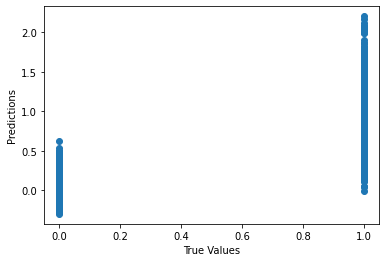

In [496]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [497]:
print ("Score:", model.score(X_test, y_test) )


Score: 0.6716082533123429
